In [2]:
import pandas as pd
from sklearn.decomposition import PCA 
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from scipy.stats import zscore
import seaborn as sns
from scipy.stats import boxcox
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
data=pd.read_csv("HR_analytics.csv")
data

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [3]:
df_HRdata=pd.DataFrame(data)
df_HRdata

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [4]:
df_HRdata.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

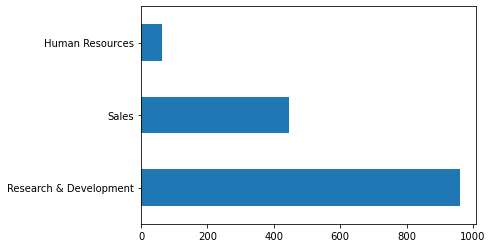

In [5]:
# BIVARIATE ANALYSIS
df_HRdata["Department"].value_counts().plot(kind='barh')

In [6]:
# Changing data from categorical form to numerical
le=LabelEncoder()
df_HRdata["Attrition"]=le.fit_transform(df_HRdata["Attrition"])
df_HRdata["Department"]=le.fit_transform(df_HRdata["Department"])
df_HRdata["EducationField"]=le.fit_transform(df_HRdata["EducationField"])
df_HRdata["BusinessTravel"]=le.fit_transform(df_HRdata["BusinessTravel"])
df_HRdata["Gender"]=le.fit_transform(df_HRdata["Gender"])
df_HRdata["JobRole"]=le.fit_transform(df_HRdata["JobRole"])
df_HRdata["MaritalStatus"]=le.fit_transform(df_HRdata["MaritalStatus"])
df_HRdata["Over18"]=le.fit_transform(df_HRdata["Over18"])
df_HRdata["OverTime"]=le.fit_transform(df_HRdata["OverTime"])

In [7]:
df_HRdata

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,1102,2,1,2,1,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,0,1,279,1,8,1,1,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1,2,1373,1,2,2,4,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,0,1,1392,1,3,4,1,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,0,2,591,1,2,1,3,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0,1,884,1,23,2,3,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,0,2,613,1,6,1,3,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,0,2,155,1,4,3,1,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,0,1,1023,2,2,3,3,1,2065,...,4,80,0,17,3,2,9,6,0,8


# EDA

In [8]:
# Finding of NUll Value
df_HRdata.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [9]:
df_HRdata.dtypes

Age                         int64
Attrition                   int32
BusinessTravel              int32
DailyRate                   int64
Department                  int32
DistanceFromHome            int64
Education                   int64
EducationField              int32
EmployeeCount               int64
EmployeeNumber              int64
EnvironmentSatisfaction     int64
Gender                      int32
HourlyRate                  int64
JobInvolvement              int64
JobLevel                    int64
JobRole                     int32
JobSatisfaction             int64
MaritalStatus               int32
MonthlyIncome               int64
MonthlyRate                 int64
NumCompaniesWorked          int64
Over18                      int32
OverTime                    int32
PercentSalaryHike           int64
PerformanceRating           int64
RelationshipSatisfaction    int64
StandardHours               int64
StockOptionLevel            int64
TotalWorkingYears           int64
TrainingTimesL

In [10]:
df_HRdata.describe()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,0.161224,1.607483,802.485714,1.260544,9.192517,2.912925,2.247619,1.0,1024.865306,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,0.367863,0.665455,403.509100,0.527792,8.106864,1.024165,1.331369,0.0,602.024335,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,0.000000,0.000000,102.000000,0.000000,1.000000,1.000000,0.000000,1.0,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,0.000000,1.000000,465.000000,1.000000,2.000000,2.000000,1.000000,1.0,491.250000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,0.000000,2.000000,802.000000,1.000000,7.000000,3.000000,2.000000,1.0,1020.500000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,0.000000,2.000000,1157.000000,2.000000,14.000000,4.000000,3.000000,1.0,1555.750000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1.000000,2.000000,1499.000000,2.000000,29.000000,5.000000,5.000000,1.0,2068.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [11]:
df_HRdata.corr()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,-0.159205,0.024751,0.010661,-0.031882,-0.001686,0.208034,-0.040873,NaN,-0.010145,...,0.053535,NaN,0.037510,0.680381,-0.019621,-0.021490,0.311309,0.212901,0.216513,0.202089
Attrition,-0.159205,1.000000,0.000074,-0.056652,0.063991,0.077924,-0.031373,0.026846,NaN,-0.010577,...,-0.045872,NaN,-0.137145,-0.171063,-0.059478,-0.063939,-0.134392,-0.160545,-0.033019,-0.156199
BusinessTravel,0.024751,0.000074,1.000000,-0.004086,-0.009044,-0.024469,0.000757,0.023724,NaN,-0.015578,...,-0.035986,NaN,-0.016727,0.034226,0.015240,-0.011256,-0.014575,-0.011497,-0.032591,-0.022636
DailyRate,0.010661,-0.056652,-0.004086,1.000000,0.007109,-0.004985,-0.016806,0.037709,NaN,-0.050990,...,0.007846,NaN,0.042143,0.014515,0.002453,-0.037848,-0.034055,0.009932,-0.033229,-0.026363
Department,-0.031882,0.063991,-0.009044,0.007109,1.000000,0.017225,0.007996,0.013720,NaN,-0.010895,...,-0.022414,NaN,-0.012193,-0.015762,0.036875,0.026383,0.022920,0.056315,0.040061,0.034282
DistanceFromHome,-0.001686,0.077924,-0.024469,-0.004985,0.017225,1.000000,0.021042,0.002013,NaN,0.032916,...,0.006557,NaN,0.044872,0.004628,-0.036942,-0.026556,0.009508,0.018845,0.010029,0.014406
Education,0.208034,-0.031373,0.000757,-0.016806,0.007996,0.021042,1.000000,-0.039592,NaN,0.042070,...,-0.009118,NaN,0.018422,0.148280,-0.025100,0.009819,0.069114,0.060236,0.054254,0.069065
EducationField,-0.040873,0.026846,0.023724,0.037709,0.013720,0.002013,-0.039592,1.000000,NaN,-0.002516,...,-0.004378,NaN,-0.016185,-0.027848,0.049195,0.041191,-0.018692,-0.010506,0.002326,-0.004130
EmployeeCount,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EmployeeNumber,-0.010145,-0.010577,-0.015578,-0.050990,-0.010895,0.032916,0.042070,-0.002516,NaN,1.000000,...,-0.069861,NaN,0.062227,-0.014365,0.023603,0.010309,-0.011240,-0.008416,-0.009019,-0.009197


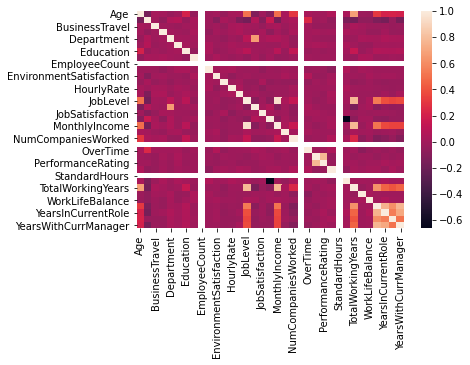

In [12]:
sns.heatmap(df_HRdata.corr())

<function matplotlib.pyplot.show(*args, **kw)>

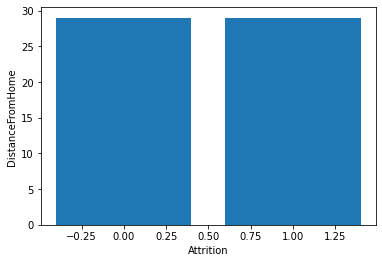

In [13]:
plt.bar(df_HRdata["Attrition"],df_HRdata["DistanceFromHome"])
plt.xlabel("Attrition")
plt.ylabel("DistanceFromHome")
plt.show

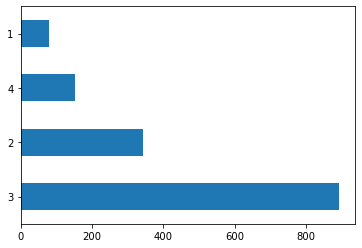

In [14]:
df_HRdata["WorkLifeBalance"].value_counts().plot(kind='barh')


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001CE478FE790>,
      dtype=object)

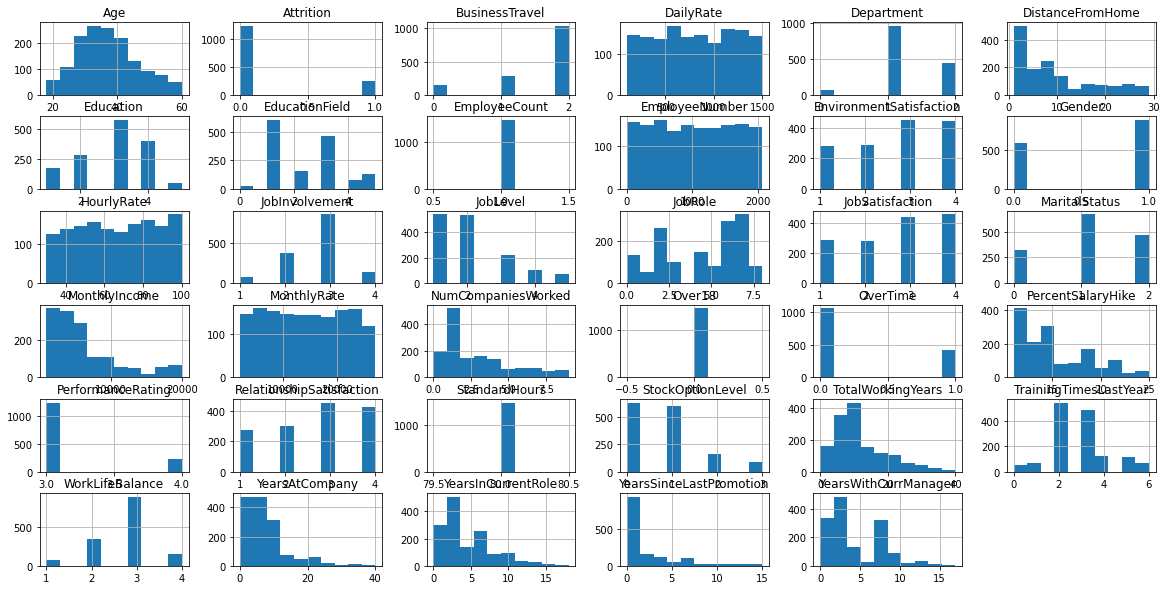

In [15]:
df_HRdata.hist(figsize=(20,10))

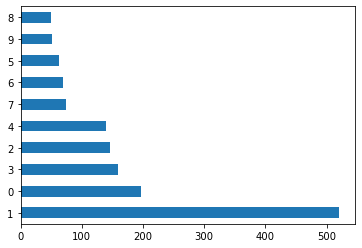

In [16]:
df_HRdata["NumCompaniesWorked"].value_counts().plot(kind='barh')


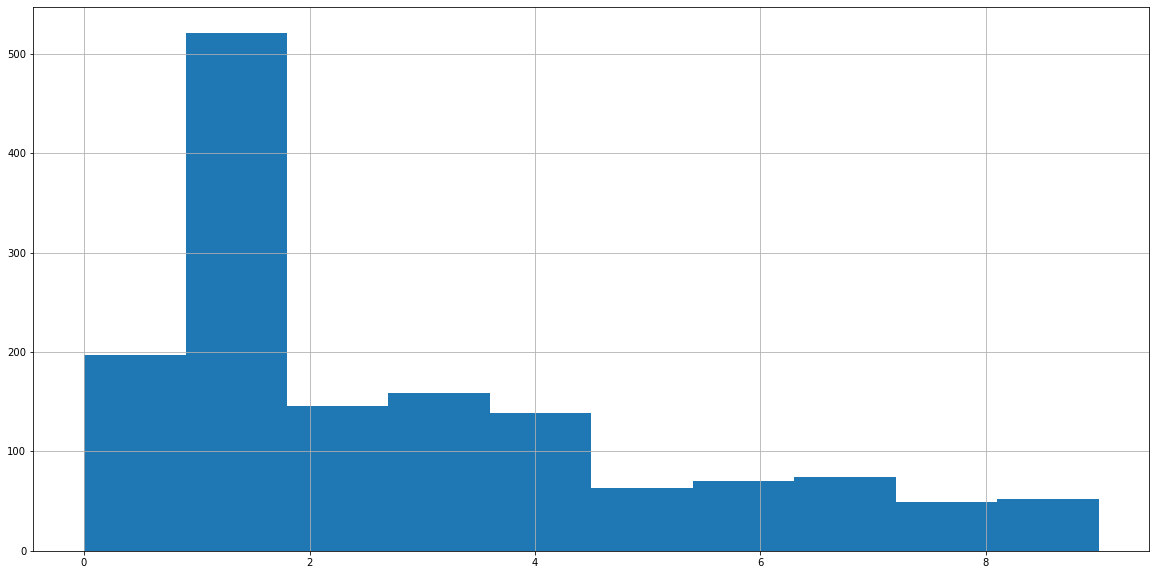

In [17]:
df_HRdata["NumCompaniesWorked"].hist(figsize=(20,10))


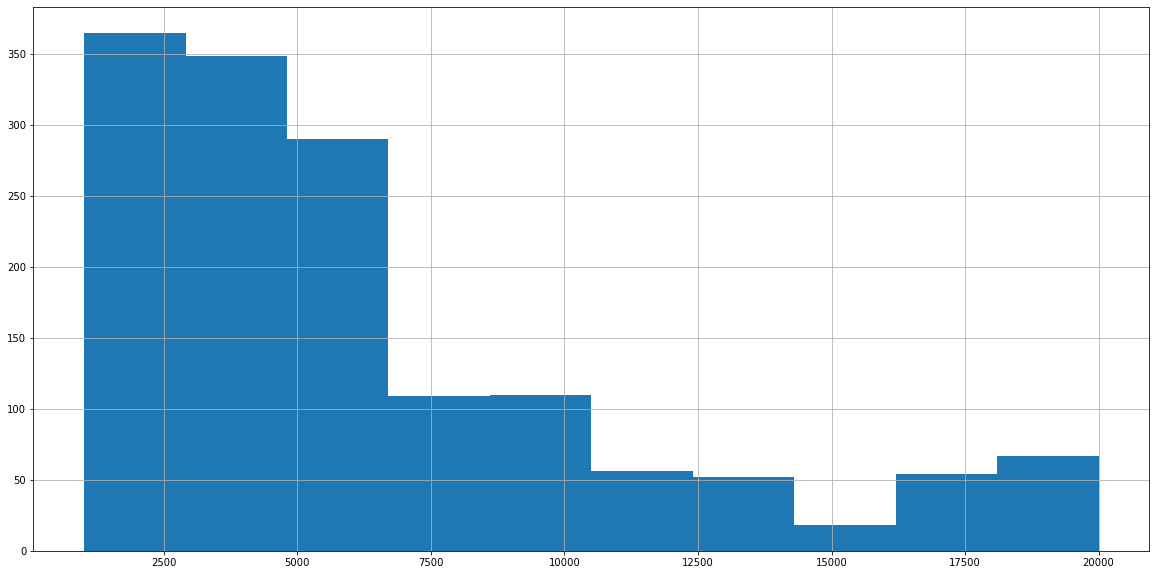

In [18]:
df_HRdata["MonthlyIncome"].hist(figsize=(20,10))

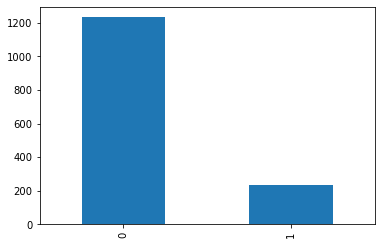

In [19]:
df_HRdata["Attrition"].value_counts().plot(kind='bar')

In [20]:
# From the alalysis it is clear that most of the paramets which define the attrition of amployees such as distance from home,income

In [21]:
# Spliting of data
x=df_HRdata.drop("Attrition",axis=1)
x

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,2,1102,2,1,2,1,1,1,2,...,1,80,0,8,0,1,6,4,0,5
1,49,1,279,1,8,1,1,1,2,3,...,4,80,1,10,3,3,10,7,1,7
2,37,2,1373,1,2,2,4,1,4,4,...,2,80,0,7,3,3,0,0,0,0
3,33,1,1392,1,3,4,1,1,5,4,...,3,80,0,8,3,3,8,7,3,0
4,27,2,591,1,2,1,3,1,7,1,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,1,884,1,23,2,3,1,2061,3,...,3,80,1,17,3,3,5,2,0,3
1466,39,2,613,1,6,1,3,1,2062,4,...,1,80,1,9,5,3,7,7,1,7
1467,27,2,155,1,4,3,1,1,2064,2,...,2,80,1,6,0,3,6,2,0,3
1468,49,1,1023,2,2,3,3,1,2065,4,...,4,80,0,17,3,2,9,6,0,8


In [22]:
y=df_HRdata.iloc[:,1]

In [23]:
y

0       1
1       0
2       1
3       0
4       0
       ..
1465    0
1466    0
1467    0
1468    0
1469    0
Name: Attrition, Length: 1470, dtype: int32

In [24]:
lregr=LogisticRegression()
def maxraccuracy_scrore(regr,x,y):
    maxraccuracy_score=0
    for r_state in range(42,101):
        x_train, x_test, y_train, y_test = train_test_split(x,y,random_state=r_state,test_size=0.20)
        regr.fit(x_train,y_train)
        y_pred=regr.predict(x_test)
        acc_scr=accuracy_score(y_test,y_pred)
        Class_rprt=classification_report(y_test,y_pred)
        conf_rprt=confusion_matrix(y_test,y_pred)
        print("classification report is",Class_rprt)
        print("confusion matrix is",conf_rprt)
        print("accuracy score correspond to random state",r_state,"is:", acc_scr)
        if acc_scr>maxraccuracy_score:
            maxraccuracy_score=acc_scr
            final_r_state=r_state
            
    print("max Accuracyscore corresponsds to ",final_r_state,"is:",maxraccuracy_score)
    return final_r_state
    
    
    

In [25]:
maxraccuracy_scrore(lregr,x,y)

C:\Users\Anubhav Agarwal\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Anubhav Agarwal\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Anubhav Agarwal\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
ST

classification report is               precision    recall  f1-score   support

           0       0.87      1.00      0.93       255
           1       0.00      0.00      0.00        39

    accuracy                           0.87       294
   macro avg       0.43      0.50      0.46       294
weighted avg       0.75      0.87      0.81       294

confusion matrix is [[255   0]
 [ 39   0]]
accuracy score correspond to random state 42 is: 0.8673469387755102
classification report is               precision    recall  f1-score   support

           0       0.79      1.00      0.88       232
           1       0.67      0.03      0.06        62

    accuracy                           0.79       294
   macro avg       0.73      0.51      0.47       294
weighted avg       0.77      0.79      0.71       294

confusion matrix is [[231   1]
 [ 60   2]]
accuracy score correspond to random state 43 is: 0.7925170068027211


C:\Users\Anubhav Agarwal\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Anubhav Agarwal\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Anubhav Agarwal\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
ST

classification report is               precision    recall  f1-score   support

           0       0.85      1.00      0.92       249
           1       0.00      0.00      0.00        45

    accuracy                           0.85       294
   macro avg       0.42      0.50      0.46       294
weighted avg       0.72      0.85      0.78       294

confusion matrix is [[249   0]
 [ 45   0]]
accuracy score correspond to random state 44 is: 0.8469387755102041
classification report is               precision    recall  f1-score   support

           0       0.81      1.00      0.89       237
           1       0.50      0.02      0.03        57

    accuracy                           0.81       294
   macro avg       0.65      0.51      0.46       294
weighted avg       0.75      0.81      0.73       294

confusion matrix is [[236   1]
 [ 56   1]]
accuracy score correspond to random state 45 is: 0.8061224489795918


C:\Users\Anubhav Agarwal\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Anubhav Agarwal\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Anubhav Agarwal\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
ST

classification report is               precision    recall  f1-score   support

           0       0.81      1.00      0.89       238
           1       0.00      0.00      0.00        56

    accuracy                           0.81       294
   macro avg       0.40      0.50      0.45       294
weighted avg       0.66      0.81      0.72       294

confusion matrix is [[238   0]
 [ 56   0]]
accuracy score correspond to random state 46 is: 0.8095238095238095
classification report is               precision    recall  f1-score   support

           0       0.84      1.00      0.91       248
           1       0.00      0.00      0.00        46

    accuracy                           0.84       294
   macro avg       0.42      0.50      0.46       294
weighted avg       0.71      0.84      0.77       294

confusion matrix is [[247   1]
 [ 46   0]]
accuracy score correspond to random state 47 is: 0.8401360544217688


C:\Users\Anubhav Agarwal\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Anubhav Agarwal\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Anubhav Agarwal\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
ST

classification report is               precision    recall  f1-score   support

           0       0.84      1.00      0.91       246
           1       0.00      0.00      0.00        48

    accuracy                           0.84       294
   macro avg       0.42      0.50      0.46       294
weighted avg       0.70      0.84      0.76       294

confusion matrix is [[246   0]
 [ 48   0]]
accuracy score correspond to random state 48 is: 0.8367346938775511
classification report is               precision    recall  f1-score   support

           0       0.84      1.00      0.91       246
           1       0.00      0.00      0.00        48

    accuracy                           0.83       294
   macro avg       0.42      0.50      0.45       294
weighted avg       0.70      0.83      0.76       294

confusion matrix is [[245   1]
 [ 48   0]]
accuracy score correspond to random state 49 is: 0.8333333333333334


C:\Users\Anubhav Agarwal\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Anubhav Agarwal\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-

classification report is               precision    recall  f1-score   support

           0       0.82      1.00      0.90       241
           1       1.00      0.02      0.04        53

    accuracy                           0.82       294
   macro avg       0.91      0.51      0.47       294
weighted avg       0.85      0.82      0.75       294

confusion matrix is [[241   0]
 [ 52   1]]
accuracy score correspond to random state 50 is: 0.8231292517006803
classification report is               precision    recall  f1-score   support

           0       0.85      1.00      0.92       248
           1       1.00      0.02      0.04        46

    accuracy                           0.85       294
   macro avg       0.92      0.51      0.48       294
weighted avg       0.87      0.85      0.78       294

confusion matrix is [[248   0]
 [ 45   1]]
accuracy score correspond to random state 51 is: 0.8469387755102041


C:\Users\Anubhav Agarwal\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Anubhav Agarwal\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-

classification report is               precision    recall  f1-score   support

           0       0.86      1.00      0.92       252
           1       1.00      0.02      0.05        42

    accuracy                           0.86       294
   macro avg       0.93      0.51      0.49       294
weighted avg       0.88      0.86      0.80       294

confusion matrix is [[252   0]
 [ 41   1]]
accuracy score correspond to random state 52 is: 0.8605442176870748
classification report is               precision    recall  f1-score   support

           0       0.86      1.00      0.92       251
           1       1.00      0.02      0.05        43

    accuracy                           0.86       294
   macro avg       0.93      0.51      0.48       294
weighted avg       0.88      0.86      0.79       294

confusion matrix is [[251   0]
 [ 42   1]]
accuracy score correspond to random state 53 is: 0.8571428571428571


C:\Users\Anubhav Agarwal\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Anubhav Agarwal\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-

classification report is               precision    recall  f1-score   support

           0       0.83      1.00      0.91       245
           1       0.00      0.00      0.00        49

    accuracy                           0.83       294
   macro avg       0.42      0.50      0.45       294
weighted avg       0.69      0.83      0.76       294

confusion matrix is [[244   1]
 [ 49   0]]
accuracy score correspond to random state 54 is: 0.8299319727891157
classification report is               precision    recall  f1-score   support

           0       0.88      1.00      0.94       260
           1       0.00      0.00      0.00        34

    accuracy                           0.88       294
   macro avg       0.44      0.50      0.47       294
weighted avg       0.78      0.88      0.83       294

confusion matrix is [[259   1]
 [ 34   0]]
accuracy score correspond to random state 55 is: 0.8809523809523809


C:\Users\Anubhav Agarwal\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Anubhav Agarwal\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Anubhav Agarwal\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
ST

classification report is               precision    recall  f1-score   support

           0       0.84      1.00      0.91       246
           1       0.00      0.00      0.00        48

    accuracy                           0.84       294
   macro avg       0.42      0.50      0.46       294
weighted avg       0.70      0.84      0.76       294

confusion matrix is [[246   0]
 [ 48   0]]
accuracy score correspond to random state 56 is: 0.8367346938775511
classification report is               precision    recall  f1-score   support

           0       0.87      1.00      0.93       254
           1       1.00      0.03      0.05        40

    accuracy                           0.87       294
   macro avg       0.93      0.51      0.49       294
weighted avg       0.89      0.87      0.81       294

confusion matrix is [[254   0]
 [ 39   1]]
accuracy score correspond to random state 57 is: 0.8673469387755102
classification report is

C:\Users\Anubhav Agarwal\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Anubhav Agarwal\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


               precision    recall  f1-score   support

           0       0.82      1.00      0.90       241
           1       0.00      0.00      0.00        53

    accuracy                           0.82       294
   macro avg       0.41      0.50      0.45       294
weighted avg       0.67      0.82      0.74       294

confusion matrix is [[240   1]
 [ 53   0]]
accuracy score correspond to random state 58 is: 0.8163265306122449
classification report is               precision    recall  f1-score   support

           0       0.84      1.00      0.92       248
           1       0.00      0.00      0.00        46

    accuracy                           0.84       294
   macro avg       0.42      0.50      0.46       294
weighted avg       0.71      0.84      0.77       294

confusion matrix is [[248   0]
 [ 46   0]]
accuracy score correspond to random state 59 is: 0.8435374149659864


C:\Users\Anubhav Agarwal\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Anubhav Agarwal\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Anubhav Agarwal\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
ST

classification report is               precision    recall  f1-score   support

           0       0.83      1.00      0.91       244
           1       0.00      0.00      0.00        50

    accuracy                           0.83       294
   macro avg       0.41      0.50      0.45       294
weighted avg       0.69      0.83      0.75       294

confusion matrix is [[244   0]
 [ 50   0]]
accuracy score correspond to random state 60 is: 0.8299319727891157
classification report is               precision    recall  f1-score   support

           0       0.84      1.00      0.91       246
           1       1.00      0.02      0.04        48

    accuracy                           0.84       294
   macro avg       0.92      0.51      0.48       294
weighted avg       0.87      0.84      0.77       294

confusion matrix is [[246   0]
 [ 47   1]]
accuracy score correspond to random state 61 is: 0.8401360544217688


C:\Users\Anubhav Agarwal\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Anubhav Agarwal\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-

classification report is               precision    recall  f1-score   support

           0       0.82      0.99      0.90       241
           1       0.40      0.04      0.07        53

    accuracy                           0.82       294
   macro avg       0.61      0.51      0.48       294
weighted avg       0.75      0.82      0.75       294

confusion matrix is [[238   3]
 [ 51   2]]
accuracy score correspond to random state 62 is: 0.8163265306122449
classification report is               precision    recall  f1-score   support

           0       0.84      1.00      0.91       247
           1       0.00      0.00      0.00        47

    accuracy                           0.84       294
   macro avg       0.42      0.50      0.46       294
weighted avg       0.71      0.84      0.77       294

confusion matrix is [[247   0]
 [ 47   0]]
accuracy score correspond to random state 63 is: 0.8401360544217688


C:\Users\Anubhav Agarwal\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Anubhav Agarwal\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-

classification report is               precision    recall  f1-score   support

           0       0.86      1.00      0.92       250
           1       1.00      0.05      0.09        44

    accuracy                           0.86       294
   macro avg       0.93      0.52      0.50       294
weighted avg       0.88      0.86      0.80       294

confusion matrix is [[250   0]
 [ 42   2]]
accuracy score correspond to random state 64 is: 0.8571428571428571
classification report is               precision    recall  f1-score   support

           0       0.85      1.00      0.91       248
           1       0.50      0.02      0.04        46

    accuracy                           0.84       294
   macro avg       0.67      0.51      0.48       294
weighted avg       0.79      0.84      0.78       294

confusion matrix is [[247   1]
 [ 45   1]]
accuracy score correspond to random state 65 is: 0.8435374149659864


C:\Users\Anubhav Agarwal\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Anubhav Agarwal\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Anubhav Agarwal\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
ST

classification report is               precision    recall  f1-score   support

           0       0.84      1.00      0.92       248
           1       0.00      0.00      0.00        46

    accuracy                           0.84       294
   macro avg       0.42      0.50      0.46       294
weighted avg       0.71      0.84      0.77       294

confusion matrix is [[248   0]
 [ 46   0]]
accuracy score correspond to random state 66 is: 0.8435374149659864
classification report is               precision    recall  f1-score   support

           0       0.86      1.00      0.92       252
           1       0.50      0.02      0.05        42

    accuracy                           0.86       294
   macro avg       0.68      0.51      0.48       294
weighted avg       0.81      0.86      0.80       294

confusion matrix is [[251   1]
 [ 41   1]]
accuracy score correspond to random state 67 is: 0.8571428571428571


C:\Users\Anubhav Agarwal\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Anubhav Agarwal\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-

classification report is               precision    recall  f1-score   support

           0       0.82      1.00      0.90       239
           1       1.00      0.02      0.04        55

    accuracy                           0.82       294
   macro avg       0.91      0.51      0.47       294
weighted avg       0.85      0.82      0.74       294

confusion matrix is [[239   0]
 [ 54   1]]
accuracy score correspond to random state 68 is: 0.8163265306122449
classification report is               precision    recall  f1-score   support

           0       0.80      1.00      0.89       236
           1       0.00      0.00      0.00        58

    accuracy                           0.80       294
   macro avg       0.40      0.50      0.44       294
weighted avg       0.64      0.80      0.71       294

confusion matrix is [[235   1]
 [ 58   0]]
accuracy score correspond to random state 69 is: 0.7993197278911565


C:\Users\Anubhav Agarwal\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Anubhav Agarwal\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-

classification report is               precision    recall  f1-score   support

           0       0.81      1.00      0.90       238
           1       1.00      0.02      0.04        56

    accuracy                           0.81       294
   macro avg       0.91      0.51      0.47       294
weighted avg       0.85      0.81      0.73       294

confusion matrix is [[238   0]
 [ 55   1]]
accuracy score correspond to random state 70 is: 0.8129251700680272
classification report is               precision    recall  f1-score   support

           0       0.84      1.00      0.91       247
           1       1.00      0.02      0.04        47

    accuracy                           0.84       294
   macro avg       0.92      0.51      0.48       294
weighted avg       0.87      0.84      0.78       294

confusion matrix is [[247   0]
 [ 46   1]]
accuracy score correspond to random state 71 is: 0.8435374149659864


C:\Users\Anubhav Agarwal\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Anubhav Agarwal\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Anubhav Agarwal\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
ST

classification report is               precision    recall  f1-score   support

           0       0.83      1.00      0.91       244
           1       0.00      0.00      0.00        50

    accuracy                           0.83       294
   macro avg       0.41      0.50      0.45       294
weighted avg       0.69      0.83      0.75       294

confusion matrix is [[244   0]
 [ 50   0]]
accuracy score correspond to random state 72 is: 0.8299319727891157
classification report is               precision    recall  f1-score   support

           0       0.85      1.00      0.92       251
           1       0.00      0.00      0.00        43

    accuracy                           0.85       294
   macro avg       0.43      0.50      0.46       294
weighted avg       0.73      0.85      0.79       294

confusion matrix is [[251   0]
 [ 43   0]]
accuracy score correspond to random state 73 is: 0.8537414965986394


C:\Users\Anubhav Agarwal\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Anubhav Agarwal\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-

classification report is               precision    recall  f1-score   support

           0       0.84      0.99      0.91       245
           1       0.50      0.04      0.08        49

    accuracy                           0.83       294
   macro avg       0.67      0.52      0.49       294
weighted avg       0.78      0.83      0.77       294

confusion matrix is [[243   2]
 [ 47   2]]
accuracy score correspond to random state 74 is: 0.8333333333333334
classification report is               precision    recall  f1-score   support

           0       0.81      1.00      0.89       237
           1       0.00      0.00      0.00        57

    accuracy                           0.81       294
   macro avg       0.40      0.50      0.45       294
weighted avg       0.65      0.81      0.72       294

confusion matrix is [[237   0]
 [ 57   0]]
accuracy score correspond to random state 75 is: 0.8061224489795918


C:\Users\Anubhav Agarwal\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Anubhav Agarwal\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-

classification report is               precision    recall  f1-score   support

           0       0.84      1.00      0.91       243
           1       1.00      0.06      0.11        51

    accuracy                           0.84       294
   macro avg       0.92      0.53      0.51       294
weighted avg       0.86      0.84      0.77       294

confusion matrix is [[243   0]
 [ 48   3]]
accuracy score correspond to random state 76 is: 0.8367346938775511
classification report is               precision    recall  f1-score   support

           0       0.85      1.00      0.91       248
           1       0.50      0.02      0.04        46

    accuracy                           0.84       294
   macro avg       0.67      0.51      0.48       294
weighted avg       0.79      0.84      0.78       294

confusion matrix is [[247   1]
 [ 45   1]]
accuracy score correspond to random state 77 is: 0.8435374149659864


C:\Users\Anubhav Agarwal\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Anubhav Agarwal\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Anubhav Agarwal\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
ST

classification report is               precision    recall  f1-score   support

           0       0.86      1.00      0.92       252
           1       0.00      0.00      0.00        42

    accuracy                           0.86       294
   macro avg       0.43      0.50      0.46       294
weighted avg       0.73      0.86      0.79       294

confusion matrix is [[252   0]
 [ 42   0]]
accuracy score correspond to random state 78 is: 0.8571428571428571
classification report is               precision    recall  f1-score   support

           0       0.81      1.00      0.89       237
           1       0.50      0.02      0.03        57

    accuracy                           0.81       294
   macro avg       0.65      0.51      0.46       294
weighted avg       0.75      0.81      0.73       294

confusion matrix is [[236   1]
 [ 56   1]]
accuracy score correspond to random state 79 is: 0.8061224489795918


C:\Users\Anubhav Agarwal\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Anubhav Agarwal\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-

classification report is               precision    recall  f1-score   support

           0       0.84      1.00      0.91       247
           1       0.00      0.00      0.00        47

    accuracy                           0.84       294
   macro avg       0.42      0.50      0.46       294
weighted avg       0.71      0.84      0.77       294

confusion matrix is [[246   1]
 [ 47   0]]
accuracy score correspond to random state 80 is: 0.8367346938775511
classification report is               precision    recall  f1-score   support

           0       0.84      1.00      0.91       247
           1       0.00      0.00      0.00        47

    accuracy                           0.84       294
   macro avg       0.42      0.50      0.46       294
weighted avg       0.71      0.84      0.77       294

confusion matrix is [[247   0]
 [ 47   0]]
accuracy score correspond to random state 81 is: 0.8401360544217688


C:\Users\Anubhav Agarwal\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Anubhav Agarwal\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Anubhav Agarwal\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
ST

classification report is               precision    recall  f1-score   support

           0       0.83      1.00      0.91       245
           1       0.00      0.00      0.00        49

    accuracy                           0.83       294
   macro avg       0.42      0.50      0.45       294
weighted avg       0.69      0.83      0.76       294

confusion matrix is [[245   0]
 [ 49   0]]
accuracy score correspond to random state 82 is: 0.8333333333333334
classification report is               precision    recall  f1-score   support

           0       0.85      1.00      0.92       249
           1       0.00      0.00      0.00        45

    accuracy                           0.85       294
   macro avg       0.42      0.50      0.46       294
weighted avg       0.72      0.85      0.78       294

confusion matrix is [[249   0]
 [ 45   0]]
accuracy score correspond to random state 83 is: 0.8469387755102041


C:\Users\Anubhav Agarwal\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Anubhav Agarwal\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-

classification report is               precision    recall  f1-score   support

           0       0.84      1.00      0.91       246
           1       0.50      0.02      0.04        48

    accuracy                           0.84       294
   macro avg       0.67      0.51      0.48       294
weighted avg       0.78      0.84      0.77       294

confusion matrix is [[245   1]
 [ 47   1]]
accuracy score correspond to random state 84 is: 0.8367346938775511
classification report is               precision    recall  f1-score   support

           0       0.84      1.00      0.91       246
           1       0.00      0.00      0.00        48

    accuracy                           0.84       294
   macro avg       0.42      0.50      0.46       294
weighted avg       0.70      0.84      0.76       294

confusion matrix is [[246   0]
 [ 48   0]]
accuracy score correspond to random state 85 is: 0.8367346938775511


C:\Users\Anubhav Agarwal\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Anubhav Agarwal\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Anubhav Agarwal\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
ST

classification report is               precision    recall  f1-score   support

           0       0.85      1.00      0.92       250
           1       0.00      0.00      0.00        44

    accuracy                           0.85       294
   macro avg       0.43      0.50      0.46       294
weighted avg       0.72      0.85      0.78       294

confusion matrix is [[250   0]
 [ 44   0]]
accuracy score correspond to random state 86 is: 0.8503401360544217
classification report is               precision    recall  f1-score   support

           0       0.83      1.00      0.90       243
           1       0.00      0.00      0.00        51

    accuracy                           0.82       294
   macro avg       0.41      0.50      0.45       294
weighted avg       0.68      0.82      0.75       294

confusion matrix is [[242   1]
 [ 51   0]]
accuracy score correspond to random state 87 is: 0.8231292517006803


C:\Users\Anubhav Agarwal\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Anubhav Agarwal\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-

classification report is               precision    recall  f1-score   support

           0       0.82      0.99      0.90       242
           1       0.00      0.00      0.00        52

    accuracy                           0.82       294
   macro avg       0.41      0.50      0.45       294
weighted avg       0.68      0.82      0.74       294

confusion matrix is [[240   2]
 [ 52   0]]
accuracy score correspond to random state 88 is: 0.8163265306122449
classification report is               precision    recall  f1-score   support

           0       0.82      1.00      0.90       240
           1       0.50      0.02      0.04        54

    accuracy                           0.82       294
   macro avg       0.66      0.51      0.47       294
weighted avg       0.76      0.82      0.74       294

confusion matrix is [[239   1]
 [ 53   1]]
accuracy score correspond to random state 89 is: 0.8163265306122449


C:\Users\Anubhav Agarwal\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Anubhav Agarwal\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-

classification report is               precision    recall  f1-score   support

           0       0.84      1.00      0.91       246
           1       1.00      0.02      0.04        48

    accuracy                           0.84       294
   macro avg       0.92      0.51      0.48       294
weighted avg       0.87      0.84      0.77       294

confusion matrix is [[246   0]
 [ 47   1]]
accuracy score correspond to random state 90 is: 0.8401360544217688
classification report is               precision    recall  f1-score   support

           0       0.85      1.00      0.92       250
           1       0.00      0.00      0.00        44

    accuracy                           0.85       294
   macro avg       0.43      0.50      0.46       294
weighted avg       0.72      0.85      0.78       294

confusion matrix is [[250   0]
 [ 44   0]]
accuracy score correspond to random state 91 is: 0.8503401360544217


C:\Users\Anubhav Agarwal\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Anubhav Agarwal\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-

classification report is               precision    recall  f1-score   support

           0       0.84      1.00      0.91       245
           1       1.00      0.02      0.04        49

    accuracy                           0.84       294
   macro avg       0.92      0.51      0.48       294
weighted avg       0.86      0.84      0.77       294

confusion matrix is [[245   0]
 [ 48   1]]
accuracy score correspond to random state 92 is: 0.8367346938775511
classification report is               precision    recall  f1-score   support

           0       0.85      1.00      0.92       249
           1       1.00      0.02      0.04        45

    accuracy                           0.85       294
   macro avg       0.92      0.51      0.48       294
weighted avg       0.87      0.85      0.78       294

confusion matrix is [[249   0]
 [ 44   1]]
accuracy score correspond to random state 93 is: 0.8503401360544217


C:\Users\Anubhav Agarwal\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Anubhav Agarwal\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-

classification report is               precision    recall  f1-score   support

           0       0.85      1.00      0.92       250
           1       0.00      0.00      0.00        44

    accuracy                           0.85       294
   macro avg       0.42      0.50      0.46       294
weighted avg       0.72      0.85      0.78       294

confusion matrix is [[249   1]
 [ 44   0]]
accuracy score correspond to random state 94 is: 0.8469387755102041
classification report is               precision    recall  f1-score   support

           0       0.83      1.00      0.91       244
           1       1.00      0.02      0.04        50

    accuracy                           0.83       294
   macro avg       0.92      0.51      0.47       294
weighted avg       0.86      0.83      0.76       294

confusion matrix is [[244   0]
 [ 49   1]]
accuracy score correspond to random state 95 is: 0.8333333333333334


C:\Users\Anubhav Agarwal\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Anubhav Agarwal\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Anubhav Agarwal\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
ST

classification report is               precision    recall  f1-score   support

           0       0.82      1.00      0.90       240
           1       0.00      0.00      0.00        54

    accuracy                           0.82       294
   macro avg       0.41      0.50      0.45       294
weighted avg       0.67      0.82      0.73       294

confusion matrix is [[240   0]
 [ 54   0]]
accuracy score correspond to random state 96 is: 0.8163265306122449
classification report is               precision    recall  f1-score   support

           0       0.81      1.00      0.89       238
           1       0.00      0.00      0.00        56

    accuracy                           0.81       294
   macro avg       0.40      0.50      0.45       294
weighted avg       0.66      0.81      0.72       294

confusion matrix is [[238   0]
 [ 56   0]]
accuracy score correspond to random state 97 is: 0.8095238095238095


C:\Users\Anubhav Agarwal\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Anubhav Agarwal\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Anubhav Agarwal\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
ST

classification report is               precision    recall  f1-score   support

           0       0.85      1.00      0.92       251
           1       0.00      0.00      0.00        43

    accuracy                           0.85       294
   macro avg       0.43      0.50      0.46       294
weighted avg       0.73      0.85      0.79       294

confusion matrix is [[251   0]
 [ 43   0]]
accuracy score correspond to random state 98 is: 0.8537414965986394
classification report is               precision    recall  f1-score   support

           0       0.82      1.00      0.90       242
           1       0.00      0.00      0.00        52

    accuracy                           0.82       294
   macro avg       0.41      0.50      0.45       294
weighted avg       0.68      0.82      0.74       294

confusion matrix is [[242   0]
 [ 52   0]]
accuracy score correspond to random state 99 is: 0.8231292517006803
classification report is               precision    recall  f1-score   sup

C:\Users\Anubhav Agarwal\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


55

In [26]:
x_train, x_test, y_train, y_test = train_test_split(x,y,random_state=55,test_size=0.20)
from sklearn.model_selection import GridSearchCV
parameters={"n_neighbors":[5,10,15,20,25,30]}
gkcv=GridSearchCV(estimator=KNeighborsClassifier(),param_grid=parameters)
gkcv.fit(x_train,y_train)
print(gkcv.best_params_)  

{'n_neighbors': 30}


In [27]:
Kregr=KNeighborsClassifier(n_neighbors=10)
maxraccuracy_scrore(Kregr,x,y)

classification report is               precision    recall  f1-score   support

           0       0.87      0.98      0.92       255
           1       0.00      0.00      0.00        39

    accuracy                           0.85       294
   macro avg       0.43      0.49      0.46       294
weighted avg       0.75      0.85      0.80       294

confusion matrix is [[251   4]
 [ 39   0]]
accuracy score correspond to random state 42 is: 0.8537414965986394
classification report is               precision    recall  f1-score   support

           0       0.79      0.99      0.88       232
           1       0.33      0.02      0.03        62

    accuracy                           0.79       294
   macro avg       0.56      0.50      0.46       294
weighted avg       0.69      0.79      0.70       294

confusion matrix is [[230   2]
 [ 61   1]]
accuracy score correspond to random state 43 is: 0.7857142857142857
classification report is               precision    recall  f1-score   sup

C:\Users\Anubhav Agarwal\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


classification report is               precision    recall  f1-score   support

           0       0.84      0.99      0.91       248
           1       0.00      0.00      0.00        46

    accuracy                           0.84       294
   macro avg       0.42      0.50      0.46       294
weighted avg       0.71      0.84      0.77       294

confusion matrix is [[246   2]
 [ 46   0]]
accuracy score correspond to random state 51 is: 0.8367346938775511
classification report is               precision    recall  f1-score   support

           0       0.86      1.00      0.92       252
           1       0.00      0.00      0.00        42

    accuracy                           0.86       294
   macro avg       0.43      0.50      0.46       294
weighted avg       0.73      0.86      0.79       294

confusion matrix is [[252   0]
 [ 42   0]]
accuracy score correspond to random state 52 is: 0.8571428571428571
classification report is               precision    recall  f1-score   sup

C:\Users\Anubhav Agarwal\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


classification report is               precision    recall  f1-score   support

           0       0.84      1.00      0.91       245
           1       1.00      0.02      0.04        49

    accuracy                           0.84       294
   macro avg       0.92      0.51      0.48       294
weighted avg       0.86      0.84      0.77       294

confusion matrix is [[245   0]
 [ 48   1]]
accuracy score correspond to random state 54 is: 0.8367346938775511
classification report is               precision    recall  f1-score   support

           0       0.89      0.98      0.93       260
           1       0.20      0.03      0.05        34

    accuracy                           0.87       294
   macro avg       0.54      0.51      0.49       294
weighted avg       0.81      0.87      0.83       294

confusion matrix is [[256   4]
 [ 33   1]]
accuracy score correspond to random state 55 is: 0.8741496598639455
classification report is               precision    recall  f1-score   sup

C:\Users\Anubhav Agarwal\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


classification report is               precision    recall  f1-score   support

           0       0.84      1.00      0.92       248
           1       0.00      0.00      0.00        46

    accuracy                           0.84       294
   macro avg       0.42      0.50      0.46       294
weighted avg       0.71      0.84      0.77       294

confusion matrix is [[248   0]
 [ 46   0]]
accuracy score correspond to random state 59 is: 0.8435374149659864
classification report is               precision    recall  f1-score   support

           0       0.83      0.99      0.90       244
           1       0.00      0.00      0.00        50

    accuracy                           0.82       294
   macro avg       0.41      0.50      0.45       294
weighted avg       0.69      0.82      0.75       294

confusion matrix is [[242   2]
 [ 50   0]]
accuracy score correspond to random state 60 is: 0.8231292517006803
classification report is               precision    recall  f1-score   sup

C:\Users\Anubhav Agarwal\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Anubhav Agarwal\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


classification report is               precision    recall  f1-score   support

           0       0.84      1.00      0.92       248
           1       0.00      0.00      0.00        46

    accuracy                           0.84       294
   macro avg       0.42      0.50      0.46       294
weighted avg       0.71      0.84      0.77       294

confusion matrix is [[248   0]
 [ 46   0]]
accuracy score correspond to random state 66 is: 0.8435374149659864
classification report is               precision    recall  f1-score   support

           0       0.86      0.99      0.92       252
           1       0.25      0.02      0.04        42

    accuracy                           0.85       294
   macro avg       0.55      0.51      0.48       294
weighted avg       0.77      0.85      0.79       294

confusion matrix is [[249   3]
 [ 41   1]]
accuracy score correspond to random state 67 is: 0.8503401360544217
classification report is               precision    recall  f1-score   sup

C:\Users\Anubhav Agarwal\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


               precision    recall  f1-score   support

           0       0.84      1.00      0.91       246
           1       0.00      0.00      0.00        48

    accuracy                           0.84       294
   macro avg       0.42      0.50      0.46       294
weighted avg       0.70      0.84      0.76       294

confusion matrix is [[246   0]
 [ 48   0]]
accuracy score correspond to random state 84 is: 0.8367346938775511
classification report is               precision    recall  f1-score   support

           0       0.84      1.00      0.91       246
           1       0.00      0.00      0.00        48

    accuracy                           0.83       294
   macro avg       0.42      0.50      0.45       294
weighted avg       0.70      0.83      0.76       294

confusion matrix is [[245   1]
 [ 48   0]]
accuracy score correspond to random state 85 is: 0.8333333333333334
classification report is               precision    recall  f1-score   support

           0      

C:\Users\Anubhav Agarwal\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


classification report is               precision    recall  f1-score   support

           0       0.83      1.00      0.91       243
           1       0.00      0.00      0.00        51

    accuracy                           0.83       294
   macro avg       0.41      0.50      0.45       294
weighted avg       0.68      0.83      0.75       294

confusion matrix is [[243   0]
 [ 51   0]]
accuracy score correspond to random state 87 is: 0.826530612244898
classification report is               precision    recall  f1-score   support

           0       0.83      1.00      0.90       242
           1       0.50      0.02      0.04        52

    accuracy                           0.82       294
   macro avg       0.66      0.51      0.47       294
weighted avg       0.77      0.82      0.75       294

confusion matrix is [[241   1]
 [ 51   1]]
accuracy score correspond to random state 88 is: 0.8231292517006803
classification report is               precision    recall  f1-score   supp

C:\Users\Anubhav Agarwal\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


classification report is               precision    recall  f1-score   support

           0       0.81      0.99      0.89       238
           1       0.33      0.02      0.03        56

    accuracy                           0.81       294
   macro avg       0.57      0.50      0.46       294
weighted avg       0.72      0.81      0.73       294

confusion matrix is [[236   2]
 [ 55   1]]
accuracy score correspond to random state 97 is: 0.8061224489795918
classification report is               precision    recall  f1-score   support

           0       0.85      0.99      0.92       251
           1       0.00      0.00      0.00        43

    accuracy                           0.85       294
   macro avg       0.43      0.50      0.46       294
weighted avg       0.73      0.85      0.78       294

confusion matrix is [[249   2]
 [ 43   0]]
accuracy score correspond to random state 98 is: 0.8469387755102041
classification report is               precision    recall  f1-score   sup

55

In [28]:
sregr=SVC(kernel="poly")
maxraccuracy_scrore(sregr,x,y)

C:\Users\Anubhav Agarwal\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


classification report is               precision    recall  f1-score   support

           0       0.87      1.00      0.93       255
           1       0.00      0.00      0.00        39

    accuracy                           0.87       294
   macro avg       0.43      0.50      0.46       294
weighted avg       0.75      0.87      0.81       294

confusion matrix is [[255   0]
 [ 39   0]]
accuracy score correspond to random state 42 is: 0.8673469387755102


C:\Users\Anubhav Agarwal\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


classification report is               precision    recall  f1-score   support

           0       0.79      1.00      0.88       232
           1       0.00      0.00      0.00        62

    accuracy                           0.79       294
   macro avg       0.39      0.50      0.44       294
weighted avg       0.62      0.79      0.70       294

confusion matrix is [[232   0]
 [ 62   0]]
accuracy score correspond to random state 43 is: 0.7891156462585034


C:\Users\Anubhav Agarwal\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


classification report is               precision    recall  f1-score   support

           0       0.85      1.00      0.92       249
           1       0.00      0.00      0.00        45

    accuracy                           0.85       294
   macro avg       0.42      0.50      0.46       294
weighted avg       0.72      0.85      0.78       294

confusion matrix is [[249   0]
 [ 45   0]]
accuracy score correspond to random state 44 is: 0.8469387755102041


C:\Users\Anubhav Agarwal\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


classification report is               precision    recall  f1-score   support

           0       0.81      1.00      0.89       237
           1       0.00      0.00      0.00        57

    accuracy                           0.81       294
   macro avg       0.40      0.50      0.45       294
weighted avg       0.65      0.81      0.72       294

confusion matrix is [[237   0]
 [ 57   0]]
accuracy score correspond to random state 45 is: 0.8061224489795918


C:\Users\Anubhav Agarwal\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


classification report is               precision    recall  f1-score   support

           0       0.81      1.00      0.89       238
           1       0.00      0.00      0.00        56

    accuracy                           0.81       294
   macro avg       0.40      0.50      0.45       294
weighted avg       0.66      0.81      0.72       294

confusion matrix is [[238   0]
 [ 56   0]]
accuracy score correspond to random state 46 is: 0.8095238095238095


C:\Users\Anubhav Agarwal\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


classification report is               precision    recall  f1-score   support

           0       0.84      1.00      0.92       248
           1       0.00      0.00      0.00        46

    accuracy                           0.84       294
   macro avg       0.42      0.50      0.46       294
weighted avg       0.71      0.84      0.77       294

confusion matrix is [[248   0]
 [ 46   0]]
accuracy score correspond to random state 47 is: 0.8435374149659864


C:\Users\Anubhav Agarwal\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


classification report is               precision    recall  f1-score   support

           0       0.84      1.00      0.91       246
           1       0.00      0.00      0.00        48

    accuracy                           0.84       294
   macro avg       0.42      0.50      0.46       294
weighted avg       0.70      0.84      0.76       294

confusion matrix is [[246   0]
 [ 48   0]]
accuracy score correspond to random state 48 is: 0.8367346938775511


C:\Users\Anubhav Agarwal\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


classification report is               precision    recall  f1-score   support

           0       0.84      1.00      0.91       246
           1       0.00      0.00      0.00        48

    accuracy                           0.84       294
   macro avg       0.42      0.50      0.46       294
weighted avg       0.70      0.84      0.76       294

confusion matrix is [[246   0]
 [ 48   0]]
accuracy score correspond to random state 49 is: 0.8367346938775511


C:\Users\Anubhav Agarwal\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


classification report is               precision    recall  f1-score   support

           0       0.82      1.00      0.90       241
           1       0.00      0.00      0.00        53

    accuracy                           0.82       294
   macro avg       0.41      0.50      0.45       294
weighted avg       0.67      0.82      0.74       294

confusion matrix is [[241   0]
 [ 53   0]]
accuracy score correspond to random state 50 is: 0.8197278911564626


C:\Users\Anubhav Agarwal\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


classification report is               precision    recall  f1-score   support

           0       0.84      1.00      0.92       248
           1       0.00      0.00      0.00        46

    accuracy                           0.84       294
   macro avg       0.42      0.50      0.46       294
weighted avg       0.71      0.84      0.77       294

confusion matrix is [[248   0]
 [ 46   0]]
accuracy score correspond to random state 51 is: 0.8435374149659864


C:\Users\Anubhav Agarwal\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


classification report is               precision    recall  f1-score   support

           0       0.86      1.00      0.92       252
           1       0.00      0.00      0.00        42

    accuracy                           0.86       294
   macro avg       0.43      0.50      0.46       294
weighted avg       0.73      0.86      0.79       294

confusion matrix is [[252   0]
 [ 42   0]]
accuracy score correspond to random state 52 is: 0.8571428571428571


C:\Users\Anubhav Agarwal\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


classification report is               precision    recall  f1-score   support

           0       0.85      1.00      0.92       251
           1       0.00      0.00      0.00        43

    accuracy                           0.85       294
   macro avg       0.43      0.50      0.46       294
weighted avg       0.73      0.85      0.79       294

confusion matrix is [[251   0]
 [ 43   0]]
accuracy score correspond to random state 53 is: 0.8537414965986394


C:\Users\Anubhav Agarwal\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


classification report is               precision    recall  f1-score   support

           0       0.83      1.00      0.91       245
           1       0.00      0.00      0.00        49

    accuracy                           0.83       294
   macro avg       0.42      0.50      0.45       294
weighted avg       0.69      0.83      0.76       294

confusion matrix is [[245   0]
 [ 49   0]]
accuracy score correspond to random state 54 is: 0.8333333333333334


C:\Users\Anubhav Agarwal\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


classification report is               precision    recall  f1-score   support

           0       0.88      1.00      0.94       260
           1       0.00      0.00      0.00        34

    accuracy                           0.88       294
   macro avg       0.44      0.50      0.47       294
weighted avg       0.78      0.88      0.83       294

confusion matrix is [[260   0]
 [ 34   0]]
accuracy score correspond to random state 55 is: 0.8843537414965986


C:\Users\Anubhav Agarwal\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


classification report is               precision    recall  f1-score   support

           0       0.84      1.00      0.91       246
           1       0.00      0.00      0.00        48

    accuracy                           0.84       294
   macro avg       0.42      0.50      0.46       294
weighted avg       0.70      0.84      0.76       294

confusion matrix is [[246   0]
 [ 48   0]]
accuracy score correspond to random state 56 is: 0.8367346938775511


C:\Users\Anubhav Agarwal\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


classification report is               precision    recall  f1-score   support

           0       0.86      1.00      0.93       254
           1       0.00      0.00      0.00        40

    accuracy                           0.86       294
   macro avg       0.43      0.50      0.46       294
weighted avg       0.75      0.86      0.80       294

confusion matrix is [[254   0]
 [ 40   0]]
accuracy score correspond to random state 57 is: 0.8639455782312925


C:\Users\Anubhav Agarwal\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


classification report is               precision    recall  f1-score   support

           0       0.82      1.00      0.90       241
           1       0.00      0.00      0.00        53

    accuracy                           0.82       294
   macro avg       0.41      0.50      0.45       294
weighted avg       0.67      0.82      0.74       294

confusion matrix is [[241   0]
 [ 53   0]]
accuracy score correspond to random state 58 is: 0.8197278911564626


C:\Users\Anubhav Agarwal\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


classification report is               precision    recall  f1-score   support

           0       0.84      1.00      0.92       248
           1       0.00      0.00      0.00        46

    accuracy                           0.84       294
   macro avg       0.42      0.50      0.46       294
weighted avg       0.71      0.84      0.77       294

confusion matrix is [[248   0]
 [ 46   0]]
accuracy score correspond to random state 59 is: 0.8435374149659864


C:\Users\Anubhav Agarwal\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


classification report is               precision    recall  f1-score   support

           0       0.83      1.00      0.91       244
           1       0.00      0.00      0.00        50

    accuracy                           0.83       294
   macro avg       0.41      0.50      0.45       294
weighted avg       0.69      0.83      0.75       294

confusion matrix is [[244   0]
 [ 50   0]]
accuracy score correspond to random state 60 is: 0.8299319727891157


C:\Users\Anubhav Agarwal\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


classification report is               precision    recall  f1-score   support

           0       0.84      1.00      0.91       246
           1       0.00      0.00      0.00        48

    accuracy                           0.84       294
   macro avg       0.42      0.50      0.46       294
weighted avg       0.70      0.84      0.76       294

confusion matrix is [[246   0]
 [ 48   0]]
accuracy score correspond to random state 61 is: 0.8367346938775511


C:\Users\Anubhav Agarwal\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


classification report is               precision    recall  f1-score   support

           0       0.82      1.00      0.90       241
           1       0.00      0.00      0.00        53

    accuracy                           0.82       294
   macro avg       0.41      0.50      0.45       294
weighted avg       0.67      0.82      0.74       294

confusion matrix is [[241   0]
 [ 53   0]]
accuracy score correspond to random state 62 is: 0.8197278911564626


C:\Users\Anubhav Agarwal\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


classification report is               precision    recall  f1-score   support

           0       0.84      1.00      0.91       247
           1       0.00      0.00      0.00        47

    accuracy                           0.84       294
   macro avg       0.42      0.50      0.46       294
weighted avg       0.71      0.84      0.77       294

confusion matrix is [[247   0]
 [ 47   0]]
accuracy score correspond to random state 63 is: 0.8401360544217688


C:\Users\Anubhav Agarwal\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


classification report is               precision    recall  f1-score   support

           0       0.85      1.00      0.92       250
           1       0.00      0.00      0.00        44

    accuracy                           0.85       294
   macro avg       0.43      0.50      0.46       294
weighted avg       0.72      0.85      0.78       294

confusion matrix is [[250   0]
 [ 44   0]]
accuracy score correspond to random state 64 is: 0.8503401360544217


C:\Users\Anubhav Agarwal\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


classification report is               precision    recall  f1-score   support

           0       0.84      1.00      0.92       248
           1       0.00      0.00      0.00        46

    accuracy                           0.84       294
   macro avg       0.42      0.50      0.46       294
weighted avg       0.71      0.84      0.77       294

confusion matrix is [[248   0]
 [ 46   0]]
accuracy score correspond to random state 65 is: 0.8435374149659864


C:\Users\Anubhav Agarwal\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


classification report is               precision    recall  f1-score   support

           0       0.84      1.00      0.92       248
           1       0.00      0.00      0.00        46

    accuracy                           0.84       294
   macro avg       0.42      0.50      0.46       294
weighted avg       0.71      0.84      0.77       294

confusion matrix is [[248   0]
 [ 46   0]]
accuracy score correspond to random state 66 is: 0.8435374149659864


C:\Users\Anubhav Agarwal\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


classification report is               precision    recall  f1-score   support

           0       0.86      1.00      0.92       252
           1       0.00      0.00      0.00        42

    accuracy                           0.86       294
   macro avg       0.43      0.50      0.46       294
weighted avg       0.73      0.86      0.79       294

confusion matrix is [[252   0]
 [ 42   0]]
accuracy score correspond to random state 67 is: 0.8571428571428571


C:\Users\Anubhav Agarwal\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


classification report is               precision    recall  f1-score   support

           0       0.81      1.00      0.90       239
           1       0.00      0.00      0.00        55

    accuracy                           0.81       294
   macro avg       0.41      0.50      0.45       294
weighted avg       0.66      0.81      0.73       294

confusion matrix is [[239   0]
 [ 55   0]]
accuracy score correspond to random state 68 is: 0.8129251700680272


C:\Users\Anubhav Agarwal\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


classification report is               precision    recall  f1-score   support

           0       0.80      1.00      0.89       236
           1       0.00      0.00      0.00        58

    accuracy                           0.80       294
   macro avg       0.40      0.50      0.45       294
weighted avg       0.64      0.80      0.71       294

confusion matrix is [[236   0]
 [ 58   0]]
accuracy score correspond to random state 69 is: 0.8027210884353742


C:\Users\Anubhav Agarwal\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


classification report is               precision    recall  f1-score   support

           0       0.81      1.00      0.89       238
           1       0.00      0.00      0.00        56

    accuracy                           0.81       294
   macro avg       0.40      0.50      0.45       294
weighted avg       0.66      0.81      0.72       294

confusion matrix is [[238   0]
 [ 56   0]]
accuracy score correspond to random state 70 is: 0.8095238095238095


C:\Users\Anubhav Agarwal\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


classification report is               precision    recall  f1-score   support

           0       0.84      1.00      0.91       247
           1       0.00      0.00      0.00        47

    accuracy                           0.84       294
   macro avg       0.42      0.50      0.46       294
weighted avg       0.71      0.84      0.77       294

confusion matrix is [[247   0]
 [ 47   0]]
accuracy score correspond to random state 71 is: 0.8401360544217688


C:\Users\Anubhav Agarwal\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


classification report is               precision    recall  f1-score   support

           0       0.83      1.00      0.91       244
           1       0.00      0.00      0.00        50

    accuracy                           0.83       294
   macro avg       0.41      0.50      0.45       294
weighted avg       0.69      0.83      0.75       294

confusion matrix is [[244   0]
 [ 50   0]]
accuracy score correspond to random state 72 is: 0.8299319727891157


C:\Users\Anubhav Agarwal\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


classification report is               precision    recall  f1-score   support

           0       0.85      1.00      0.92       251
           1       0.00      0.00      0.00        43

    accuracy                           0.85       294
   macro avg       0.43      0.50      0.46       294
weighted avg       0.73      0.85      0.79       294

confusion matrix is [[251   0]
 [ 43   0]]
accuracy score correspond to random state 73 is: 0.8537414965986394


C:\Users\Anubhav Agarwal\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


classification report is               precision    recall  f1-score   support

           0       0.83      1.00      0.91       245
           1       0.00      0.00      0.00        49

    accuracy                           0.83       294
   macro avg       0.42      0.50      0.45       294
weighted avg       0.69      0.83      0.76       294

confusion matrix is [[245   0]
 [ 49   0]]
accuracy score correspond to random state 74 is: 0.8333333333333334


C:\Users\Anubhav Agarwal\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


classification report is               precision    recall  f1-score   support

           0       0.81      1.00      0.89       237
           1       0.00      0.00      0.00        57

    accuracy                           0.81       294
   macro avg       0.40      0.50      0.45       294
weighted avg       0.65      0.81      0.72       294

confusion matrix is [[237   0]
 [ 57   0]]
accuracy score correspond to random state 75 is: 0.8061224489795918


C:\Users\Anubhav Agarwal\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


classification report is               precision    recall  f1-score   support

           0       0.83      1.00      0.91       243
           1       0.00      0.00      0.00        51

    accuracy                           0.83       294
   macro avg       0.41      0.50      0.45       294
weighted avg       0.68      0.83      0.75       294

confusion matrix is [[243   0]
 [ 51   0]]
accuracy score correspond to random state 76 is: 0.826530612244898


C:\Users\Anubhav Agarwal\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


classification report is               precision    recall  f1-score   support

           0       0.84      1.00      0.92       248
           1       0.00      0.00      0.00        46

    accuracy                           0.84       294
   macro avg       0.42      0.50      0.46       294
weighted avg       0.71      0.84      0.77       294

confusion matrix is [[248   0]
 [ 46   0]]
accuracy score correspond to random state 77 is: 0.8435374149659864


C:\Users\Anubhav Agarwal\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


classification report is               precision    recall  f1-score   support

           0       0.86      1.00      0.92       252
           1       0.00      0.00      0.00        42

    accuracy                           0.86       294
   macro avg       0.43      0.50      0.46       294
weighted avg       0.73      0.86      0.79       294

confusion matrix is [[252   0]
 [ 42   0]]
accuracy score correspond to random state 78 is: 0.8571428571428571


C:\Users\Anubhav Agarwal\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


classification report is               precision    recall  f1-score   support

           0       0.81      1.00      0.89       237
           1       0.00      0.00      0.00        57

    accuracy                           0.81       294
   macro avg       0.40      0.50      0.45       294
weighted avg       0.65      0.81      0.72       294

confusion matrix is [[237   0]
 [ 57   0]]
accuracy score correspond to random state 79 is: 0.8061224489795918


C:\Users\Anubhav Agarwal\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


classification report is               precision    recall  f1-score   support

           0       0.84      1.00      0.91       247
           1       0.00      0.00      0.00        47

    accuracy                           0.84       294
   macro avg       0.42      0.50      0.46       294
weighted avg       0.71      0.84      0.77       294

confusion matrix is [[247   0]
 [ 47   0]]
accuracy score correspond to random state 80 is: 0.8401360544217688


C:\Users\Anubhav Agarwal\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


classification report is               precision    recall  f1-score   support

           0       0.84      1.00      0.91       247
           1       0.00      0.00      0.00        47

    accuracy                           0.84       294
   macro avg       0.42      0.50      0.46       294
weighted avg       0.71      0.84      0.77       294

confusion matrix is [[247   0]
 [ 47   0]]
accuracy score correspond to random state 81 is: 0.8401360544217688


C:\Users\Anubhav Agarwal\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


classification report is               precision    recall  f1-score   support

           0       0.83      1.00      0.91       245
           1       0.00      0.00      0.00        49

    accuracy                           0.83       294
   macro avg       0.42      0.50      0.45       294
weighted avg       0.69      0.83      0.76       294

confusion matrix is [[245   0]
 [ 49   0]]
accuracy score correspond to random state 82 is: 0.8333333333333334


C:\Users\Anubhav Agarwal\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


classification report is               precision    recall  f1-score   support

           0       0.85      1.00      0.92       249
           1       0.00      0.00      0.00        45

    accuracy                           0.85       294
   macro avg       0.42      0.50      0.46       294
weighted avg       0.72      0.85      0.78       294

confusion matrix is [[249   0]
 [ 45   0]]
accuracy score correspond to random state 83 is: 0.8469387755102041


C:\Users\Anubhav Agarwal\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


classification report is               precision    recall  f1-score   support

           0       0.84      1.00      0.91       246
           1       0.00      0.00      0.00        48

    accuracy                           0.84       294
   macro avg       0.42      0.50      0.46       294
weighted avg       0.70      0.84      0.76       294

confusion matrix is [[246   0]
 [ 48   0]]
accuracy score correspond to random state 84 is: 0.8367346938775511


C:\Users\Anubhav Agarwal\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


classification report is               precision    recall  f1-score   support

           0       0.84      1.00      0.91       246
           1       0.00      0.00      0.00        48

    accuracy                           0.84       294
   macro avg       0.42      0.50      0.46       294
weighted avg       0.70      0.84      0.76       294

confusion matrix is [[246   0]
 [ 48   0]]
accuracy score correspond to random state 85 is: 0.8367346938775511


C:\Users\Anubhav Agarwal\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


classification report is               precision    recall  f1-score   support

           0       0.85      1.00      0.92       250
           1       0.00      0.00      0.00        44

    accuracy                           0.85       294
   macro avg       0.43      0.50      0.46       294
weighted avg       0.72      0.85      0.78       294

confusion matrix is [[250   0]
 [ 44   0]]
accuracy score correspond to random state 86 is: 0.8503401360544217


C:\Users\Anubhav Agarwal\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


classification report is               precision    recall  f1-score   support

           0       0.83      1.00      0.91       243
           1       0.00      0.00      0.00        51

    accuracy                           0.83       294
   macro avg       0.41      0.50      0.45       294
weighted avg       0.68      0.83      0.75       294

confusion matrix is [[243   0]
 [ 51   0]]
accuracy score correspond to random state 87 is: 0.826530612244898


C:\Users\Anubhav Agarwal\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


classification report is               precision    recall  f1-score   support

           0       0.82      1.00      0.90       242
           1       0.00      0.00      0.00        52

    accuracy                           0.82       294
   macro avg       0.41      0.50      0.45       294
weighted avg       0.68      0.82      0.74       294

confusion matrix is [[242   0]
 [ 52   0]]
accuracy score correspond to random state 88 is: 0.8231292517006803


C:\Users\Anubhav Agarwal\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


classification report is               precision    recall  f1-score   support

           0       0.82      1.00      0.90       240
           1       0.00      0.00      0.00        54

    accuracy                           0.82       294
   macro avg       0.41      0.50      0.45       294
weighted avg       0.67      0.82      0.73       294

confusion matrix is [[240   0]
 [ 54   0]]
accuracy score correspond to random state 89 is: 0.8163265306122449


C:\Users\Anubhav Agarwal\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


classification report is               precision    recall  f1-score   support

           0       0.84      1.00      0.91       246
           1       0.00      0.00      0.00        48

    accuracy                           0.84       294
   macro avg       0.42      0.50      0.46       294
weighted avg       0.70      0.84      0.76       294

confusion matrix is [[246   0]
 [ 48   0]]
accuracy score correspond to random state 90 is: 0.8367346938775511


C:\Users\Anubhav Agarwal\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


classification report is               precision    recall  f1-score   support

           0       0.85      1.00      0.92       250
           1       0.00      0.00      0.00        44

    accuracy                           0.85       294
   macro avg       0.43      0.50      0.46       294
weighted avg       0.72      0.85      0.78       294

confusion matrix is [[250   0]
 [ 44   0]]
accuracy score correspond to random state 91 is: 0.8503401360544217


C:\Users\Anubhav Agarwal\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


classification report is               precision    recall  f1-score   support

           0       0.83      1.00      0.91       245
           1       0.00      0.00      0.00        49

    accuracy                           0.83       294
   macro avg       0.42      0.50      0.45       294
weighted avg       0.69      0.83      0.76       294

confusion matrix is [[245   0]
 [ 49   0]]
accuracy score correspond to random state 92 is: 0.8333333333333334


C:\Users\Anubhav Agarwal\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


classification report is               precision    recall  f1-score   support

           0       0.85      1.00      0.92       249
           1       0.00      0.00      0.00        45

    accuracy                           0.85       294
   macro avg       0.42      0.50      0.46       294
weighted avg       0.72      0.85      0.78       294

confusion matrix is [[249   0]
 [ 45   0]]
accuracy score correspond to random state 93 is: 0.8469387755102041


C:\Users\Anubhav Agarwal\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


classification report is               precision    recall  f1-score   support

           0       0.85      1.00      0.92       250
           1       0.00      0.00      0.00        44

    accuracy                           0.85       294
   macro avg       0.43      0.50      0.46       294
weighted avg       0.72      0.85      0.78       294

confusion matrix is [[250   0]
 [ 44   0]]
accuracy score correspond to random state 94 is: 0.8503401360544217


C:\Users\Anubhav Agarwal\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


classification report is               precision    recall  f1-score   support

           0       0.83      1.00      0.91       244
           1       0.00      0.00      0.00        50

    accuracy                           0.83       294
   macro avg       0.41      0.50      0.45       294
weighted avg       0.69      0.83      0.75       294

confusion matrix is [[244   0]
 [ 50   0]]
accuracy score correspond to random state 95 is: 0.8299319727891157


C:\Users\Anubhav Agarwal\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


classification report is               precision    recall  f1-score   support

           0       0.82      1.00      0.90       240
           1       0.00      0.00      0.00        54

    accuracy                           0.82       294
   macro avg       0.41      0.50      0.45       294
weighted avg       0.67      0.82      0.73       294

confusion matrix is [[240   0]
 [ 54   0]]
accuracy score correspond to random state 96 is: 0.8163265306122449


C:\Users\Anubhav Agarwal\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


classification report is               precision    recall  f1-score   support

           0       0.81      1.00      0.89       238
           1       0.00      0.00      0.00        56

    accuracy                           0.81       294
   macro avg       0.40      0.50      0.45       294
weighted avg       0.66      0.81      0.72       294

confusion matrix is [[238   0]
 [ 56   0]]
accuracy score correspond to random state 97 is: 0.8095238095238095


C:\Users\Anubhav Agarwal\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


classification report is               precision    recall  f1-score   support

           0       0.85      1.00      0.92       251
           1       0.00      0.00      0.00        43

    accuracy                           0.85       294
   macro avg       0.43      0.50      0.46       294
weighted avg       0.73      0.85      0.79       294

confusion matrix is [[251   0]
 [ 43   0]]
accuracy score correspond to random state 98 is: 0.8537414965986394


C:\Users\Anubhav Agarwal\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


classification report is               precision    recall  f1-score   support

           0       0.82      1.00      0.90       242
           1       0.00      0.00      0.00        52

    accuracy                           0.82       294
   macro avg       0.41      0.50      0.45       294
weighted avg       0.68      0.82      0.74       294

confusion matrix is [[242   0]
 [ 52   0]]
accuracy score correspond to random state 99 is: 0.8231292517006803
classification report is               precision    recall  f1-score   support

           0       0.84      1.00      0.91       247
           1       0.00      0.00      0.00        47

    accuracy                           0.84       294
   macro avg       0.42      0.50      0.46       294
weighted avg       0.71      0.84      0.77       294

confusion matrix is [[247   0]
 [ 47   0]]
accuracy score correspond to random state 100 is: 0.8401360544217688
max Accuracyscore corresponsds to  55 is: 0.8843537414965986


C:\Users\Anubhav Agarwal\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


55

In [30]:
dregr=DecisionTreeClassifier()
maxraccuracy_scrore(dregr,x,y)

classification report is               precision    recall  f1-score   support

           0       0.88      0.86      0.87       255
           1       0.20      0.23      0.21        39

    accuracy                           0.78       294
   macro avg       0.54      0.54      0.54       294
weighted avg       0.79      0.78      0.78       294

confusion matrix is [[219  36]
 [ 30   9]]
accuracy score correspond to random state 42 is: 0.7755102040816326
classification report is               precision    recall  f1-score   support

           0       0.83      0.85      0.84       232
           1       0.38      0.34      0.36        62

    accuracy                           0.74       294
   macro avg       0.60      0.59      0.60       294
weighted avg       0.73      0.74      0.74       294

confusion matrix is [[197  35]
 [ 41  21]]
accuracy score correspond to random state 43 is: 0.7414965986394558
classification report is               precision    recall  f1-score   sup

classification report is               precision    recall  f1-score   support

           0       0.84      0.86      0.85       244
           1       0.24      0.22      0.23        50

    accuracy                           0.75       294
   macro avg       0.54      0.54      0.54       294
weighted avg       0.74      0.75      0.75       294

confusion matrix is [[210  34]
 [ 39  11]]
accuracy score correspond to random state 60 is: 0.7517006802721088
classification report is               precision    recall  f1-score   support

           0       0.87      0.86      0.87       246
           1       0.32      0.33      0.33        48

    accuracy                           0.78       294
   macro avg       0.59      0.60      0.60       294
weighted avg       0.78      0.78      0.78       294

confusion matrix is [[212  34]
 [ 32  16]]
accuracy score correspond to random state 61 is: 0.7755102040816326
classification report is               precision    recall  f1-score   sup

accuracy score correspond to random state 77 is: 0.7619047619047619
classification report is               precision    recall  f1-score   support

           0       0.88      0.85      0.87       252
           1       0.26      0.31      0.28        42

    accuracy                           0.78       294
   macro avg       0.57      0.58      0.57       294
weighted avg       0.79      0.78      0.78       294

confusion matrix is [[215  37]
 [ 29  13]]
accuracy score correspond to random state 78 is: 0.7755102040816326
classification report is               precision    recall  f1-score   support

           0       0.84      0.88      0.86       237
           1       0.36      0.28      0.31        57

    accuracy                           0.76       294
   macro avg       0.60      0.58      0.58       294
weighted avg       0.74      0.76      0.75       294

confusion matrix is [[208  29]
 [ 41  16]]
accuracy score correspond to random state 79 is: 0.7619047619047619
classi

classification report is               precision    recall  f1-score   support

           0       0.88      0.89      0.89       251
           1       0.33      0.33      0.33        43

    accuracy                           0.81       294
   macro avg       0.61      0.61      0.61       294
weighted avg       0.80      0.81      0.81       294

confusion matrix is [[223  28]
 [ 29  14]]
accuracy score correspond to random state 98 is: 0.8061224489795918
classification report is               precision    recall  f1-score   support

           0       0.88      0.87      0.88       242
           1       0.44      0.46      0.45        52

    accuracy                           0.80       294
   macro avg       0.66      0.67      0.66       294
weighted avg       0.80      0.80      0.80       294

confusion matrix is [[211  31]
 [ 28  24]]
accuracy score correspond to random state 99 is: 0.7993197278911565
classification report is               precision    recall  f1-score   sup

100

In [37]:
from sklearn.ensemble import RandomForestClassifier

In [39]:
rregr=RandomForestClassifier(n_estimators=100)
maxraccuracy_scrore(rregr,x,y)

classification report is               precision    recall  f1-score   support

           0       0.88      1.00      0.93       255
           1       0.80      0.10      0.18        39

    accuracy                           0.88       294
   macro avg       0.84      0.55      0.56       294
weighted avg       0.87      0.88      0.83       294

confusion matrix is [[254   1]
 [ 35   4]]
accuracy score correspond to random state 42 is: 0.8775510204081632
classification report is               precision    recall  f1-score   support

           0       0.80      0.99      0.89       232
           1       0.67      0.10      0.17        62

    accuracy                           0.80       294
   macro avg       0.74      0.54      0.53       294
weighted avg       0.77      0.80      0.73       294

confusion matrix is [[229   3]
 [ 56   6]]
accuracy score correspond to random state 43 is: 0.7993197278911565
classification report is               precision    recall  f1-score   sup

classification report is               precision    recall  f1-score   support

           0       0.85      1.00      0.92       244
           1       0.86      0.12      0.21        50

    accuracy                           0.85       294
   macro avg       0.85      0.56      0.56       294
weighted avg       0.85      0.85      0.80       294

confusion matrix is [[243   1]
 [ 44   6]]
accuracy score correspond to random state 60 is: 0.8469387755102041
classification report is               precision    recall  f1-score   support

           0       0.86      0.99      0.92       246
           1       0.73      0.17      0.27        48

    accuracy                           0.85       294
   macro avg       0.79      0.58      0.59       294
weighted avg       0.84      0.85      0.81       294

confusion matrix is [[243   3]
 [ 40   8]]
accuracy score correspond to random state 61 is: 0.8537414965986394
classification report is               precision    recall  f1-score   sup

classification report is               precision    recall  f1-score   support

           0       0.87      1.00      0.93       252
           1       0.75      0.07      0.13        42

    accuracy                           0.86       294
   macro avg       0.81      0.53      0.53       294
weighted avg       0.85      0.86      0.81       294

confusion matrix is [[251   1]
 [ 39   3]]
accuracy score correspond to random state 78 is: 0.8639455782312925
classification report is               precision    recall  f1-score   support

           0       0.82      0.98      0.90       237
           1       0.64      0.12      0.21        57

    accuracy                           0.82       294
   macro avg       0.73      0.55      0.55       294
weighted avg       0.79      0.82      0.76       294

confusion matrix is [[233   4]
 [ 50   7]]
accuracy score correspond to random state 79 is: 0.8163265306122449
classification report is               precision    recall  f1-score   sup

classification report is               precision    recall  f1-score   support

           0       0.84      0.98      0.90       240
           1       0.67      0.15      0.24        54

    accuracy                           0.83       294
   macro avg       0.75      0.57      0.57       294
weighted avg       0.81      0.83      0.78       294

confusion matrix is [[236   4]
 [ 46   8]]
accuracy score correspond to random state 96 is: 0.8299319727891157
classification report is               precision    recall  f1-score   support

           0       0.82      1.00      0.90       238
           1       0.80      0.07      0.13        56

    accuracy                           0.82       294
   macro avg       0.81      0.53      0.52       294
weighted avg       0.82      0.82      0.75       294

confusion matrix is [[237   1]
 [ 52   4]]
accuracy score correspond to random state 97 is: 0.8197278911564626
classification report is               precision    recall  f1-score   sup

55

In [41]:
# Auc_Roc curve
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score


In [43]:
y_pred_prob=rregr.predict_proba(x_test)[:,1]
y_pred_prob

array([0.11, 0.04, 0.07, 0.07, 0.05, 0.08, 0.  , 0.02, 0.02, 0.06, 0.19,
       0.05, 0.49, 0.16, 0.07, 0.43, 0.02, 0.07, 0.01, 0.12, 0.09, 0.12,
       0.57, 0.07, 0.02, 0.19, 0.76, 0.34, 0.01, 0.06, 0.06, 0.02, 0.86,
       0.1 , 0.21, 0.1 , 0.03, 0.1 , 0.37, 0.06, 0.11, 0.14, 0.74, 0.01,
       0.18, 0.01, 0.01, 0.02, 0.06, 0.  , 0.05, 0.09, 0.02, 0.06, 0.13,
       0.12, 0.11, 0.03, 0.03, 0.01, 0.12, 0.05, 0.  , 0.02, 0.02, 0.03,
       0.06, 0.03, 0.1 , 0.03, 0.01, 0.07, 0.04, 0.17, 0.04, 0.  , 0.1 ,
       0.02, 0.13, 0.13, 0.12, 0.07, 0.07, 0.04, 0.  , 0.05, 0.61, 0.03,
       0.03, 0.01, 0.18, 0.08, 0.05, 0.  , 0.05, 0.01, 0.01, 0.5 , 0.06,
       0.14, 0.06, 0.1 , 0.02, 0.  , 0.11, 0.02, 0.04, 0.03, 0.28, 0.08,
       0.16, 0.06, 0.09, 0.04, 0.69, 0.07, 0.02, 0.06, 0.16, 0.05, 0.05,
       0.15, 0.05, 0.01, 0.04, 0.06, 0.86, 0.13, 0.9 , 0.72, 0.83, 0.05,
       0.08, 0.14, 0.05, 0.06, 0.06, 0.01, 0.11, 0.09, 0.08, 0.32, 0.02,
       0.24, 0.05, 0.72, 0.01, 0.03, 0.01, 0.01, 0.

In [44]:
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)
fpr

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.00769231, 0.01538462, 0.01538462, 0.02307692, 0.02307692,
       0.02692308, 0.03461538, 0.03461538, 0.04230769, 0.05      ,
       0.05384615, 0.06538462, 0.08076923, 0.09230769, 0.1       ,
       0.12307692, 0.15384615, 0.18846154, 0.21538462, 0.26538462,
       0.34230769, 0.40384615, 0.48461538, 0.58076923, 0.65384615,
       0.73461538, 0.84615385, 0.93846154, 1.        ])

In [45]:
tpr

array([0.        , 0.02941176, 0.08823529, 0.26470588, 0.32352941,
       0.38235294, 0.5       , 0.55882353, 0.61764706, 0.70588235,
       0.70588235, 0.70588235, 0.76470588, 0.76470588, 0.79411765,
       0.79411765, 0.79411765, 0.82352941, 0.82352941, 0.82352941,
       0.85294118, 0.85294118, 0.91176471, 0.91176471, 0.91176471,
       0.91176471, 0.91176471, 0.91176471, 0.94117647, 0.94117647,
       0.94117647, 0.94117647, 0.94117647, 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        ])

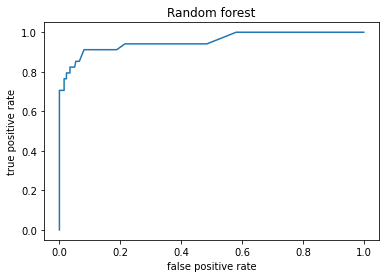

In [48]:
plt.plot(fpr,tpr)
plt.xlabel("false positive rate")
plt.ylabel("true positive rate")
plt.title("Random forest")
plt.show()

In [50]:
auc_score=roc_auc_score(y_test,y_pred_prob)
auc_score

0.9542986425339366

In [51]:
# From the analysis it is clear that Random forest is the best classifier for the random state of 55


In [55]:
# saving a file
import pickle
filename="pickrrregr.pkl"
pickle.dump(RandomForestClassifier,open(filename,"wb"))